<a href="https://colab.research.google.com/github/Akshayrajnadar/Wine_quality_prediction/blob/master/Wine_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Wine type
The wine dataset you mentioned consists of 13 parameters that describe different characteristics of the wine. These parameters are used to predict the quality of the wine, which is categorized into two types: white wine and red wine. Here's a description of the 13 parameters typically found in the wine dataset:

1. Fixed Acidity: The amount of fixed acids in the wine, which contributes to its overall acidity.
2. Volatile Acidity: The amount of volatile acids in the wine, which can contribute to undesirable vinegar-like flavors.
3. Citric Acid: The amount of citric acid present in the wine, which can add freshness and tartness.
4. Residual Sugar: The amount of sugar remaining after fermentation, which impacts the wine's sweetness.
5. Chlorides: The amount of salt or chloride present in the wine.
6. Free Sulfur Dioxide: The concentration of sulfur dioxide that is not bound to other compounds, which acts as a preservative and antimicrobial agent.
7. Total Sulfur Dioxide: The total concentration of sulfur dioxide in the wine, including both free and bound forms.
8. Density: The density of the wine, which is influenced by factors like alcohol content and sugar concentration.
9. pH: The measurement of acidity or alkalinity of the wine on a logarithmic scale.
10. Sulphates: The amount of sulphates present in the wine, which can contribute to its preservation and antioxidant properties.
11. Alcohol: The percentage of alcohol content in the wine.
12. Quality: The quality of the wine, typically rated on a scale of 1 to 10 (with higher values indicating better quality).
13. Type: The type of wine, categorized as either white or red.



In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Input
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataser using pandas

In [2]:
data =  pd.read_csv('/content/winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(6497, 13)

# Creating Input data
After generating the input data, it has come to our attention that there are missing values present. To address this issue, we have explored two potential solutions: utilizing the fillna() function to replace the null values with zeros, or opting to remove the entire row containing the missing value by employing dropna(). After careful evaluation, it has been determined that both approaches yield comparable accuracy results. Therefore, we have the flexibility to choose either method for our model.

In [4]:
X = data.drop('type', axis=1)
X = X.fillna(0)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

<Axes: >

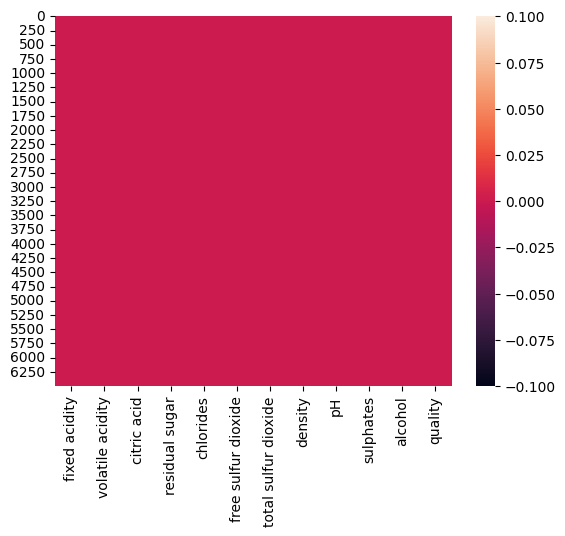

In [5]:
sns.heatmap(X.isnull())

# Creating output data

In [6]:
Y = data['type']
Y = Y.map({'white': 0, 'red': 1}).astype(str).astype(int)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64


# Splitting the data into training and testing data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [8]:
print(Y_train)

1316    0
1909    0
1039    0
3581    0
4194    0
       ..
5310    1
5628    1
2540    0
1076    0
642     0
Name: type, Length: 4547, dtype: int64


In [9]:
print(Y_test)

2645    0
2170    0
2491    0
4725    0
4986    1
       ..
6245    1
1339    0
6456    1
2114    0
249     0
Name: type, Length: 1950, dtype: int64


In [10]:
Y_train = np_utils.to_categorical(Y_train, num_classes= 2)
print(Y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
Y_test = np_utils.to_categorical(Y_test, num_classes= 2)
print(Y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Creating the model

In [12]:
model = models.Sequential()
model.add(Input(shape=(12,)))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(2, activation='softmax'))

# Compiling the model

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

In [14]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=30 , validation_data=(X_test,Y_test))

Epoch 1/100
152/152 [==============================] - 7s 10ms/step - loss: 0.2295 - accuracy: 0.9221 - val_loss: 0.1878 - val_accuracy: 0.9333
Epoch 2/100
152/152 [==============================] - 2s 10ms/step - loss: 0.1690 - accuracy: 0.9411 - val_loss: 0.1600 - val_accuracy: 0.9415
Epoch 3/100
152/152 [==============================] - 1s 9ms/step - loss: 0.1530 - accuracy: 0.9463 - val_loss: 0.1389 - val_accuracy: 0.9446
Epoch 4/100
152/152 [==============================] - 1s 10ms/step - loss: 0.1399 - accuracy: 0.9518 - val_loss: 0.1956 - val_accuracy: 0.9292
Epoch 5/100
152/152 [==============================] - 1s 10ms/step - loss: 0.1284 - accuracy: 0.9562 - val_loss: 0.1163 - val_accuracy: 0.9538
Epoch 6/100
152/152 [==============================] - 2s 14ms/step - loss: 0.1170 - accuracy: 0.9622 - val_loss: 0.1184 - val_accuracy: 0.9579
Epoch 7/100
152/152 [==============================] - 1s 10ms/step - loss: 0.1109 - accuracy: 0.9633 - val_loss: 0.1022 - val_accuracy: 

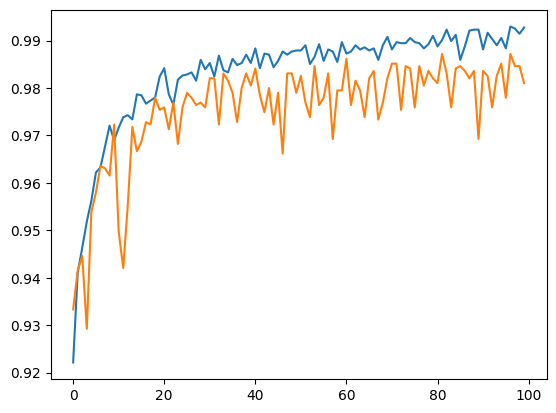

In [15]:
plt.plot(history.history['accuracy'], label= 'Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
xlabel = 'Epoch'
ylabel = 'Accuracy'
plt.show()

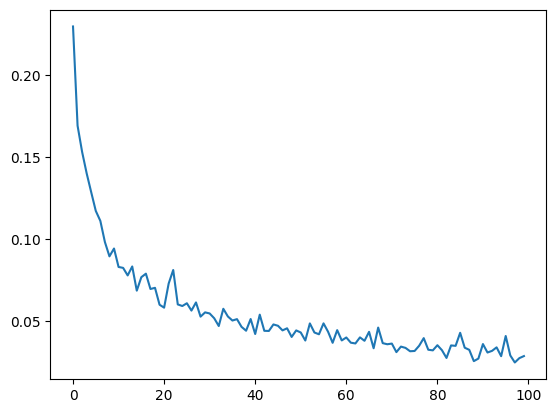

In [16]:
plt.plot(history.history['loss'], label= 'Loss')
xlabel = 'Epoch'
ylabel = 'Loss'
plt.show()